# 深層学習演習 第１回課題

### 23vr008n 高林 秀

## 選択した問題：第２回 問題２

In [51]:
import random
from tqdm import tqdm

#ニューロンクラス
class Perceptron:

    def __init__(self, w1: float, w2: float, theta: float):
        self.w1 = w1
        self.w2 = w2
        self.theta = theta

    def __forward(self, x1: float, x2: float) -> float:

        formula = (self.w1 * x1) + (self.w2 * x2) + self.theta

        return max(0, formula)

    def error(self, t_s: list[float], y_s: list[float]) -> float:
        """_summary_
        損失関数：E = Σ 1/2 * (t - y)^2を計算する
        :param t_s: 正解ラベerror(result
        :param y_s: 予測ラベル
        :return: 誤差
        """
        return sum([((t - y)**2) / 2 for t, y in zip(t_s, y_s)])

    def train(self, data: list[list[float]], eps: float=0.1) -> dict:
        """1エポック分の学習を行う
        :param data: [x1, x2, t]
        :param eps: 学習率
        :return: 重みと閾値の更新結果,誤差
        """
    
        for x1, x2, t in data:
            y = self.__forward(x1, x2)
            if y > 0:
                self.w1 = self.w1 - eps * (y - t) * x1
                self.w2 = self.w2 - eps * (y - t) * x2
                self.theta = self.theta - eps * (y - t)
        
        return {
            'w1': self.w1, 
            'w2': self.w2, 
            'theta': self.theta,
        }

    def predict(self, data: list[list[float]]) -> list[float]:
        """予測を行う
        :param data: [x1, x2]
        :return: 予測結果
        """
        return [self.__forward(x1, x2) for x1, x2, _ in data]
        

In [52]:
DATA = [
   #[x1, x2, t]
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
]

w1 = random.random()
w2 = random.random()
theta = random.random()
MAX_EPOCHS = 1000

model = Perceptron(w1, w2, theta)
errors: list = []
model_param: dict

for epoch in tqdm(range(MAX_EPOCHS), desc="[DATA 1] Training Epoch"):
    model.train(DATA)
    pred = model.predict(DATA)
    error = model.error([t for _, _, t in DATA], pred)
    
    errors.append(error)
    model_param = {
        'w1': model.w1,
        'w2': model.w2,
        'theta': model.theta,
    }
    if error <= 0.01:
        break

print("学習終了")
print(f"学習結果: {model_param}")
print(f"最終誤差: {errors[-1]}")

[DATA 1] Training Epoch:   8%|▊         | 78/1000 [00:00<?, ?it/s]

学習終了
学習結果: {'w1': 0.8455217912289831, 'w2': 0.8359601385268861, 'theta': -0.7591126054598104}
最終誤差: 0.009699306267018589


In [53]:
#誤差の推移を表示
import matplotlib.pyplot as plt

def plot_error(errors: list, title: str="Error Transition"):
    plt.plot(errors)
    plt.title(title)
    plt.ylabel("Error")
    plt.show()

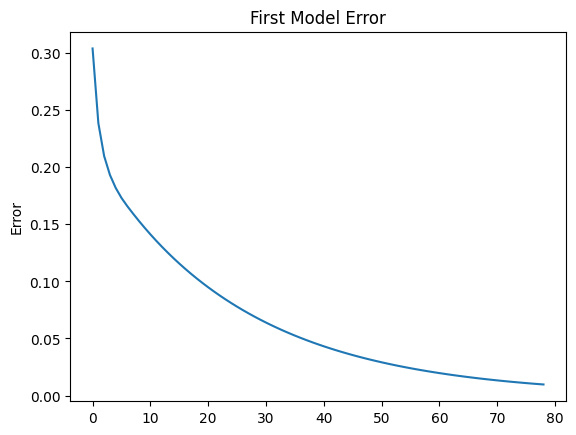

In [54]:
plot_error(errors, "First Model Error")

In [55]:
# 2番目のデータセットで学習
DATA = [
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 0],
    [1, 1, 0]
]

errors: list = []
model = Perceptron(w1, w2, theta)

for epoch in tqdm(range(MAX_EPOCHS), desc="[DATA 2]Training Epoch"):
    model.train(DATA)
    pred = model.predict(DATA)
    error = model.error([t for _, _, t in DATA], pred)
    
    errors.append(error)
    model_param = {
        'w1': model.w1,
        'w2': model.w2,
        'theta': model.theta,
    }
    if error <= 0.01:
        break

print("学習終了")
print(f"学習結果: {model_param}")
print(f"最終誤差: {errors[-1]}")



[DATA 2]Training Epoch:   3%|▎         | 30/1000 [00:00<00:00, 30211.07it/s]

学習終了
学習結果: {'w1': -0.9002069864256066, 'w2': 0.06520502718990515, 'theta': 0.8880694812858974}
最終誤差: 0.008763937237166982


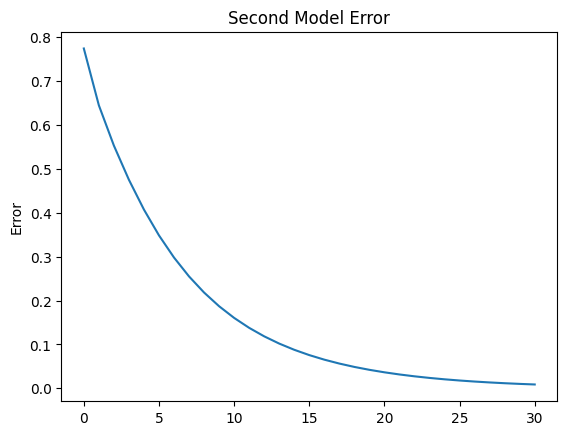

Data-1: 0, 0 -> [0.8880694812858974] (expected: 1)
Data-2: 0, 1 -> [0.9532745084758025] (expected: 1)
Data-3: 1, 0 -> [0] (expected: 0)
Data-4: 1, 1 -> [0.05306752205019594] (expected: 0)


In [56]:
plot_error(errors, "Second Model Error")

#モデルの出力と正解ラベルを表示
for i, (x1, x2, t) in enumerate(DATA):
    pred = model.predict([[x1, x2, t]])
    print(f"Data-{i+1}: {x1}, {x2} -> {pred} (expected: {t})")